# Case study on Supervised learning


Do the following in the iris dataset.

1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'C:\Users\NIDHIN\Desktop\Dataset\iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Preprocessing Steps

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
#There are some null values

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Filling all the missing values in the dataset

 ***plot numerical values and check skewness***


In [8]:
 data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

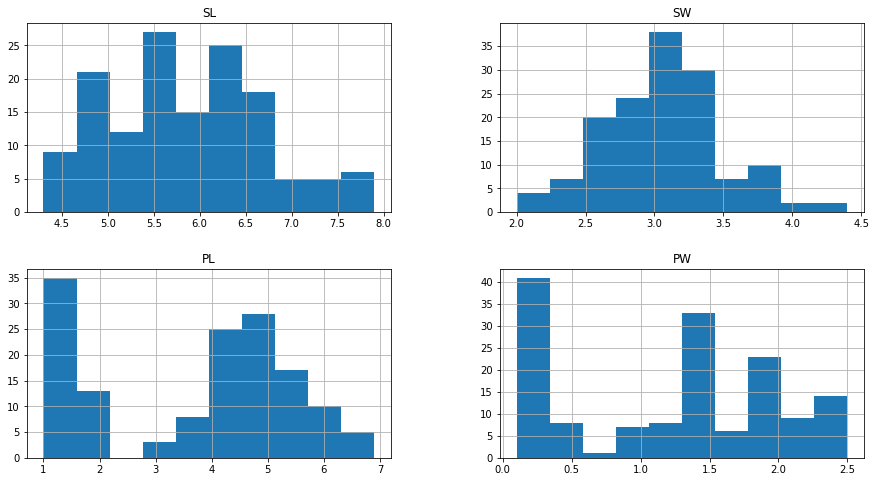

In [9]:
freqgraph=data.select_dtypes(include=['float']) #checking skewness of the float values
freqgraph.hist(figsize=(15,8))
plt.show()

INSIGHTS:
    1. From the plot we can't see skewness in SL and SW, So we can use mean or median to fill the missing values.
    2. Looks like there are some outliers present in PL and PW.

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
data['SL']=data['SL'].fillna(data['SL'].mean())

In [12]:
data.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,Iris-virginica
146,6.300000,2.5,5.0,1.9,Iris-virginica
147,6.500000,3.0,NaN,2.0,Iris-virginica
148,6.200000,3.4,5.4,2.3,Iris-virginica


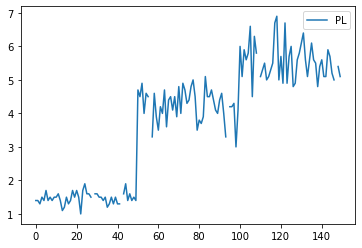

In [16]:
(data['PL']).plot(kind='line')
plt.legend()

C:\Users\NIDHIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL'>

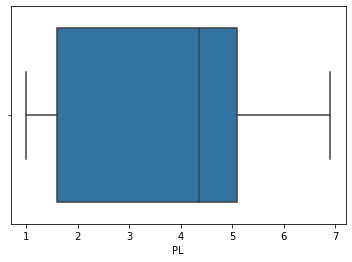

In [17]:
sns.boxplot(data['PL'])

In [18]:
# Now we can confirm that there is no outliers

In [19]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [20]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [21]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.855944,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,4.35,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


*** All missing values are removed***

In [22]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

<AxesSubplot:>

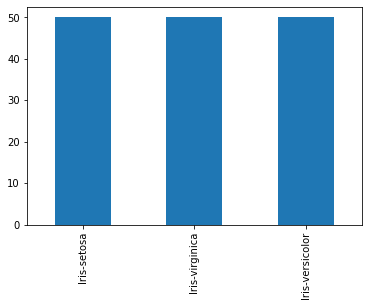

In [23]:
data['Classification'].value_counts().plot(kind='bar')

In [24]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Classification, dtype: float64

In [25]:
data1=pd.get_dummies(data)
data1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.100000,3.5,1.40,0.2,1,0,0
1,4.900000,3.0,1.40,0.2,1,0,0
2,5.855944,3.2,1.30,0.2,1,0,0
3,4.600000,3.1,1.50,0.2,1,0,0
4,5.000000,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,0,0,1
146,6.300000,2.5,5.00,1.9,0,0,1
147,6.500000,3.0,4.35,2.0,0,0,1
148,6.200000,3.4,5.40,2.3,0,0,1


In [26]:
x=data.drop('Classification',axis=1)
y=data['Classification']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object


***3.Find out which classification model gives the best result to predict iris species.***

#this is a kind of classification problem.
so we can use LR,kNN,SVM,Decision tree etc.

# Finding best classification model 

***Logistic Regression***

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
x_train.shape

(112, 4)

In [28]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()# Calling instance
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\NIDHIN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [30]:
print( classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.97        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [31]:
print('accuracy_score:',accuracy_score(y_pred,y_test))

accuracy_score: 0.9736842105263158


In [32]:
#print confusion matrix
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

*** There we can see one miss classification ***

In [33]:
y_test.value_counts()

Iris-setosa        15
Iris-virginica     12
Iris-versicolor    11
Name: Classification, dtype: int64

*** kNN***

In [34]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)# APPEND THE ACCURACY VALUES INORDER TO FIND OUT THE MAXIMUM ACCURACY
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [35]:
acc_values

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

Text(0, 0.5, 'Accuracy')

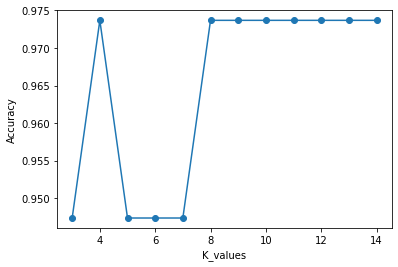

In [36]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K_values')
plt.ylabel('Accuracy')

In [37]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)

In [38]:
print('Accuracy is:',accuracy_score(y_test, y_pred))
#print('Precision is:',precision_score(y_test, y_pred))
#print('Recall is:',recall_score(y_test, y_pred))
#print('F1 score is:',f1_score(y_test, y_pred))

Accuracy is: 0.9736842105263158


In [39]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

***STANDARD SCALING***

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [42]:
# Logistc Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()# Calling instance
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [43]:
print('Accuracy is:',accuracy_score(y_test, y_pred))


Accuracy is: 0.9736842105263158


In [44]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

***kNN***

In [45]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)

In [46]:
acc_values

[]

In [47]:
print('Accuracy is:',accuracy_score(y_test, y_pred))


Accuracy is: 1.0


In [48]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

***Decision Tree Classifier***

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=dt_model.predict(x_test)
print('Accuracy on Decision tree model is:',accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is: 1.0


In [52]:
y_test.value_counts()

Iris-setosa        15
Iris-virginica     12
Iris-versicolor    11
Name: Classification, dtype: int64

In [53]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

***SVM***

In [54]:
# Linear SVM

In [55]:
# Linear Classifier
from sklearn.svm import SVC

In [56]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
y_pred=svm_linear.predict(x_test)

In [58]:
print('Accuracy using linear svm is:',accuracy_score(y_test,y_pred))

Accuracy using linear svm is: 0.9736842105263158


In [59]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [60]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

****Standardizing the Features****

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred=svm_linear.predict(x_test)

In [65]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9736842105263158


**Insight:**
       1. From the above models Decision Tree is the best option with higher accuracy.

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier()
rand_forest.fit(x_train,y_train)
pred1=rand_forest.predict(x_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

***Feature Importance***

In [67]:

pd.Series(rand_forest.feature_importances_,index=x.columns).sort_values(ascending=False)*100


PW    48.925388
PL    37.042050
SL    10.132851
SW     3.899712
dtype: float64

In [69]:
y_pred=rand_forest.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [70]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [71]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

*** Random Forest also provides the best result with great accuracy.***